Original Source: https://www.kaggle.com/code/analyticaobscura/sleep-mind/notebook

# 1 Libraries and Utilities

## 1.1 Libraries

In [3]:
pip install pywaffle

     --------------------------------------- 25.6/25.6 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install Jinja2

     -------------------------------------- 134.9/134.9 KB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pywaffle import Waffle
import warnings

# Filter warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# You can now proceed with your data analysis and visualization code
# using the imported libraries.

## 1.2 Loading data

In [47]:
df = pd.read_csv("G:\내 드라이브\DArtB\Kaggle Study\Sleep Health and Lifestyle Dataset\Sleep_health_and_lifestyle_dataset.csv") 
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [48]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

## 1.3 Non-Null ValueCounts and Feature Datatypes

In [15]:
df.shape

(374, 13)

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 1.4 Statistics of Categorical and Numerical Data

In [ ]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2).style.background_gradient(cmap='BuPu') # Jinja2라는 템플릿 엔진을 이용하여 표를 꾸며준다.

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.180000,7.130000,7.310000,59.170000,5.390000,70.170000,6816.840000
std,108.110000,8.670000,0.800000,1.200000,20.830000,1.770000,4.140000,1617.920000
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [13]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{'background-color': '#4A235A','color': '#E2EEF3'})  

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


## 1.5 Initional insights about dataset

- Categorical Features: Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
- Binary Numerical Features: Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps

# 2. Visualization of Dataset

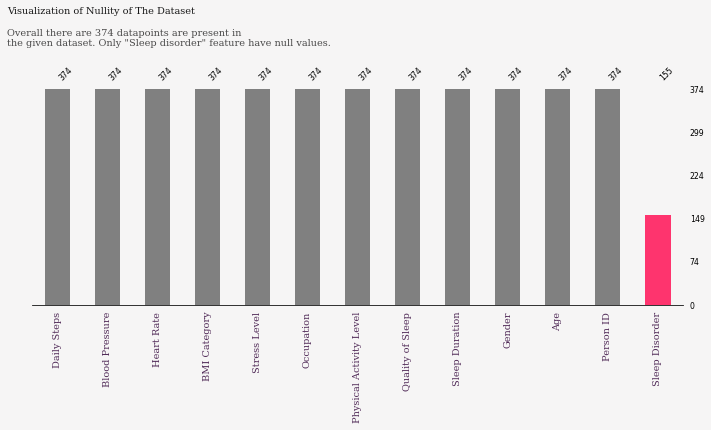

In [ ]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70) 
# fig (액자): 전체 그림의 크기, 저장, 큰 제목 등 전반적인 틀을 제어합니다.
# ax (도화지/캔버스): 실제 그래프, 축, 눈금, 라벨, 텍스트, 제목 등 그래프의 모든 시각적 요소를 세밀하게 제어합니다.
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'Serif',  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 374 datapoints are present in \nthe given dataset. Only "Sleep disorder" feature have null values.',{'font': 'Serif',  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif','weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

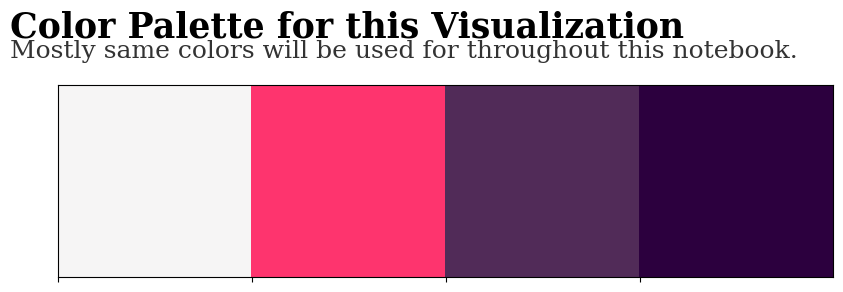

In [17]:
# color palette for visualizations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

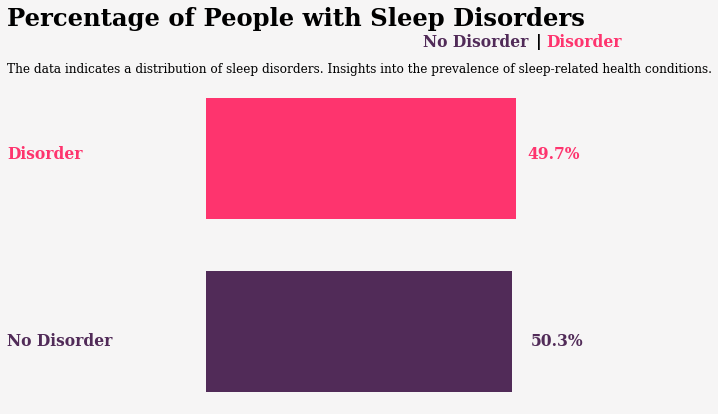

In [36]:
x = pd.DataFrame(df.groupby(['Sleep Disorder'])['Sleep Disorder'].count())

fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x['Sleep Disorder'][1], height=0.7, color='#fe346e')
plt.text(-50, -0.08, 'No Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#512b58'})
plt.text(x['Sleep Disorder'][1] * 1.05, -0.08, f'{(x["Sleep Disorder"][1] / x["Sleep Disorder"].sum() * 100):.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
ax.barh([0], x['Sleep Disorder'][0], height=0.7, color='#512b58')
plt.text(-50, 1, 'Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#fe346e'})
plt.text(x['Sleep Disorder'][0] * 1.05, 1, f'{(x["Sleep Disorder"][0] / x["Sleep Disorder"].sum() * 100):.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-50, 1.77, 'Percentage of People with Sleep Disorders', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(x['Sleep Disorder'][1] * 0.7, 1.65, 'No Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
plt.text(x['Sleep Disorder'][1] * 1.065, 1.655, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
plt.text(x['Sleep Disorder'][1] * 1.1, 1.65, 'Disorder', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
plt.text(-50, 1.5, 'The data indicates a distribution of sleep disorders. Insights into the prevalence of sleep-related health conditions.', {'font': 'Serif', 'size': '12.5', 'color': 'black'})

# Removing axes and spines for cleaner look
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# 3. Dataset Analysis

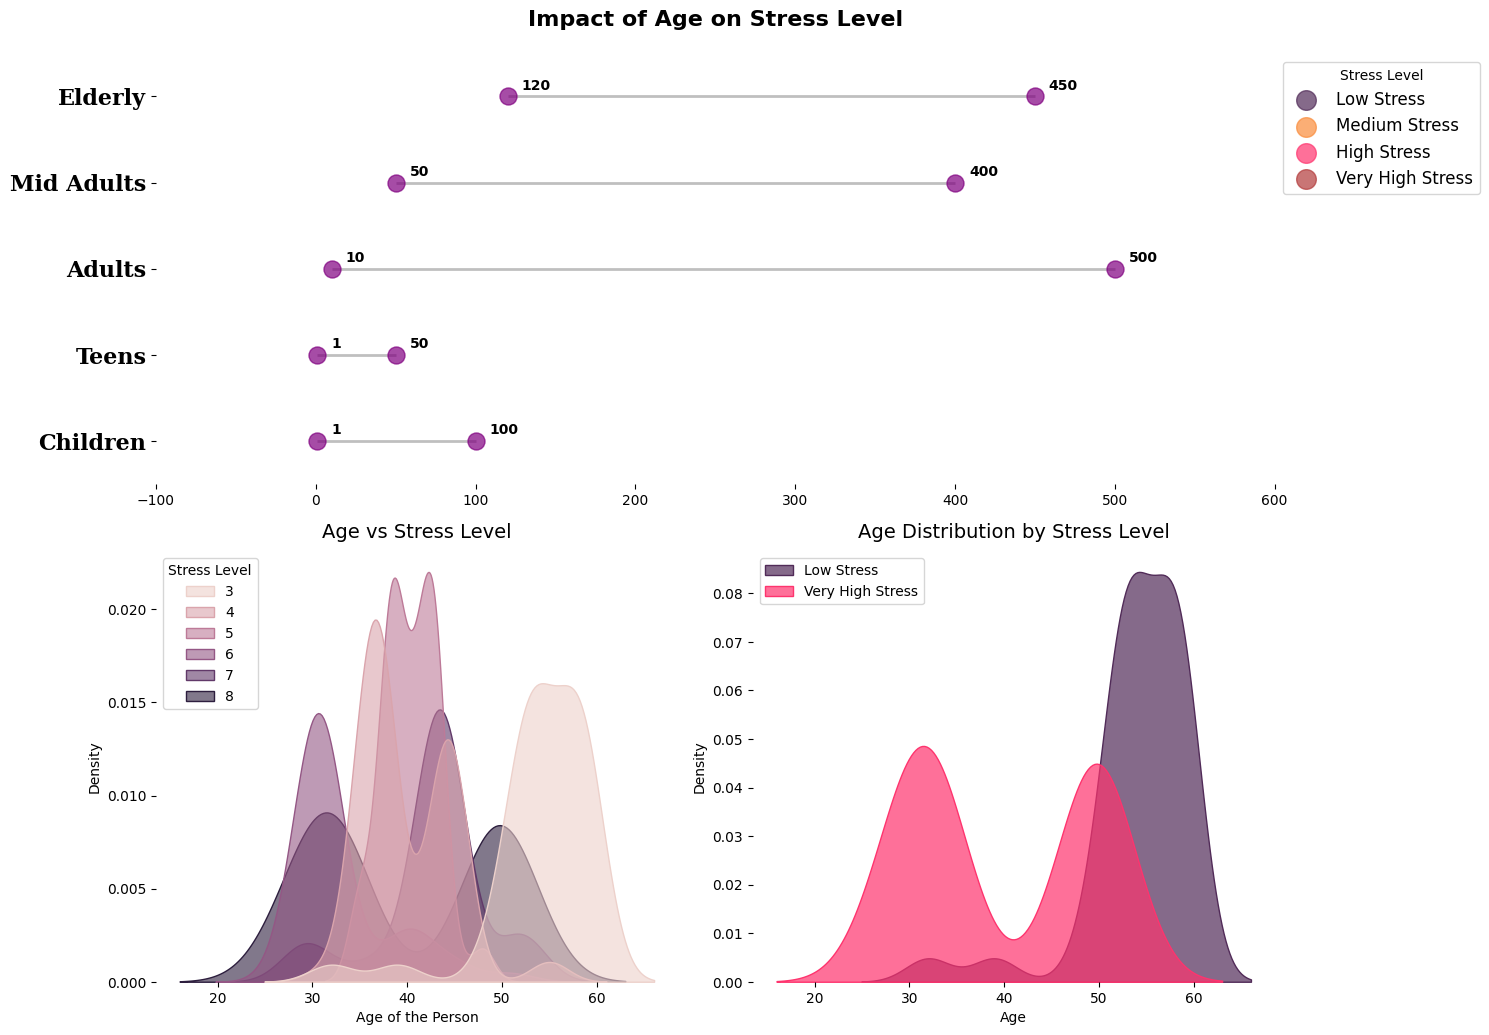

In [40]:
# 스트레스 레벨을 4개의 카테고리로 나누기 위한 조건 설정
conditions = [
    (df['Stress Level'] == 3),  # Low Stress
    (df['Stress Level'] == 4) | (df['Stress Level'] == 5),  # Medium Stress
    (df['Stress Level'] == 6) | (df['Stress Level'] == 7),  # High Stress
    (df['Stress Level'] == 8)   # Very High Stress
]
# 각 조건에 해당하는 카테고리 이름
choices = ['Low Stress', 'Medium Stress', 'High Stress', 'Very High Stress']
# 'Stress Category'라는 새로운 컬럼을 DataFrame에 추가
df['Stress Category'] = np.select(conditions, choices, default='Unknown')

# --- 1. Figure(액자)와 Axes(캔버스) 생성 ---
plt.style.use('default')
# Figure 객체(전체 그림의 틀, 액자)를 생성. 크기와 배경색 지정
fig = plt.figure(figsize=(15, 15), facecolor='white')

# subplot2grid를 사용해 3x2 격자 레이아웃을 만들고, 각 Axes(캔버스)를 배치
# ax1: 3x2 격자의 (0,0) 위치에서 2칸을 차지하는, 맨 위의 넓은 캔버스
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
# ax2: (1,0) 위치의, 두 번째 줄 왼쪽 캔버스
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
# ax3: (1,1) 위치의, 두 번째 줄 오른쪽 캔버스
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)

# --- 공통 스타일 적용 ---
# 생성된 모든 캔버스(ax1, ax2, ax3)에 대해 반복문으로 공통 스타일 지정
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')  # 각 캔버스의 배경색을 흰색으로
    ax.grid(False)             # 그리드(격자무늬) 끄기
    for spine in ax.spines.values(): # 각 캔버스의 모든 테두리(spines)를
        spine.set_visible(False)   # 보이지 않게 처리

# --- 각 스트레스 카테고리별 데이터 집계 ---
low_stress = df[df['Stress Category'] == 'Low Stress'].Age.value_counts()
# (주의: 원본 코드에 'Medium Stress '처럼 뒤에 공백이 있을 수 있습니다. 데이터에 따라 확인이 필요합니다.)
medium_stress = df[df['Stress Category'] == 'Medium Stress '].Age.value_counts()
high_stress = df[df['Stress Category'] == 'High Stress '].Age.value_counts()
very_high_stress = df[df['Stress Category'] == 'Very High Stress'].Age.value_counts()

# -----------------------------------------------------------------
# 🎨 캔버스 1 (ax1) 디자인: Matplotlib으로 직접 그리는 커스텀 차트
# -----------------------------------------------------------------
# y축 좌표와 덤벨 차트의 배경이 될 가로선(hlines)의 x축 범위 설정
y_coords = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly']
xmin_values = [100, 50, 500, 400, 450]
xmax_values = [1, 1, 10, 50, 120]

# ax1 캔버스에 회색 가로선을 그려 가이드라인 생성
ax1.hlines(y=y_coords, xmin=xmin_values, xmax=xmax_values,
           color='grey', alpha=0.5, linewidth=2)

# 가이드라인의 시작점과 끝점에 보라색 점과 숫자(좌표값)를 추가
for i, (y, xmin, xmax) in enumerate(zip(y_coords, xmin_values, xmax_values)):
    # 시작점
    ax1.scatter(xmin, y, color='purple', s=150, alpha=0.7, zorder=5)
    ax1.annotate(f'{xmin}', (xmin, y), xytext=(10, 5), textcoords='offset points', fontsize=10, fontweight='bold')
    # 끝점
    ax1.scatter(xmax, y, color='purple', s=150, alpha=0.7, zorder=5)
    ax1.annotate(f'{xmax}', (xmax, y), xytext=(10, 5), textcoords='offset points', fontsize=10, fontweight='bold')

# 실제 데이터를 ax1 캔버스 위에 산점도(scatter plot)로 플로팅
scatter_size = 200
ax1.scatter(low_stress.values, low_stress.index, s=scatter_size, color='#512b58', alpha=0.7, label='Low Stress')
ax1.scatter(medium_stress.values, medium_stress.index, s=scatter_size, color='#fa8c3b', alpha=0.7, label='Medium Stress')
ax1.scatter(high_stress.values, high_stress.index, s=scatter_size, color='#fe346e', alpha=0.7, label='High Stress')
ax1.scatter(very_high_stress.values, very_high_stress.index, s=scatter_size, color='#b33b3b', alpha=0.7, label='Very High Stress')

# ax1 캔버스의 x, y축 범위와 라벨 스타일을 세부적으로 설정
ax1.set_xlim(-100, 600)
ax1.set_ylim(-0.5, 4.5)
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                   fontdict={'font':'Serif', 'fontsize':16, 'fontweight':'bold', 'color':'black'})
# ax1 캔버스의 제목 설정
ax1.set_title('Impact of Age on Stress Level', pad=20, fontsize=16, fontweight='bold')
# ax1 캔버스의 범례 위치와 스타일 지정
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title='Stress Level')


# -----------------------------------------------------------------
# 📊 캔버스 2 (ax2) 디자인: Seaborn으로 그리는 밀도 플롯
# -----------------------------------------------------------------
# ax=ax2 옵션을 통해, Seaborn이 ax2 캔버스 위에 그리도록 지정
sns.kdeplot(data=df, x='Age', hue='Stress Level', fill=True, alpha=0.6, ax=ax2)
# ax2 캔버스의 제목과 x축 라벨을 설정
ax2.set_title('Age vs Stress Level', fontsize=14, pad=10)
ax2.set_xlabel('Age of the Person', fontsize=10)


# -----------------------------------------------------------------
# 📊 캔버스 3 (ax3) 디자인: Seaborn으로 그리는 밀도 플롯
# -----------------------------------------------------------------
# ax=ax3 옵션을 통해, Seaborn이 ax3 캔버스 위에 그리도록 지정
sns.kdeplot(data=df[df['Stress Category'] == 'Low Stress'], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#512b58', label='Low Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'Medium Stress '], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='Medium Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'High Stress '], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='High Stress')
sns.kdeplot(data=df[df['Stress Category'] == 'Very High Stress'], x='Age', ax=ax3,
            shade=True, alpha=0.7, color='#fe346e', label='Very High Stress')

# ax3 캔버스의 제목, x축 라벨, 범례를 설정
ax3.set_title('Age Distribution by Stress Level', fontsize=14, pad=10)
ax3.set_xlabel('Age', fontsize=10)
ax3.legend()

# --- 최종 마무리 ---
# Figure(액자)에 포함된 모든 캔버스들의 레이아웃을 깔끔하게 자동 조정
plt.tight_layout()
# 완성된 Figure를 화면에 표시
plt.show()

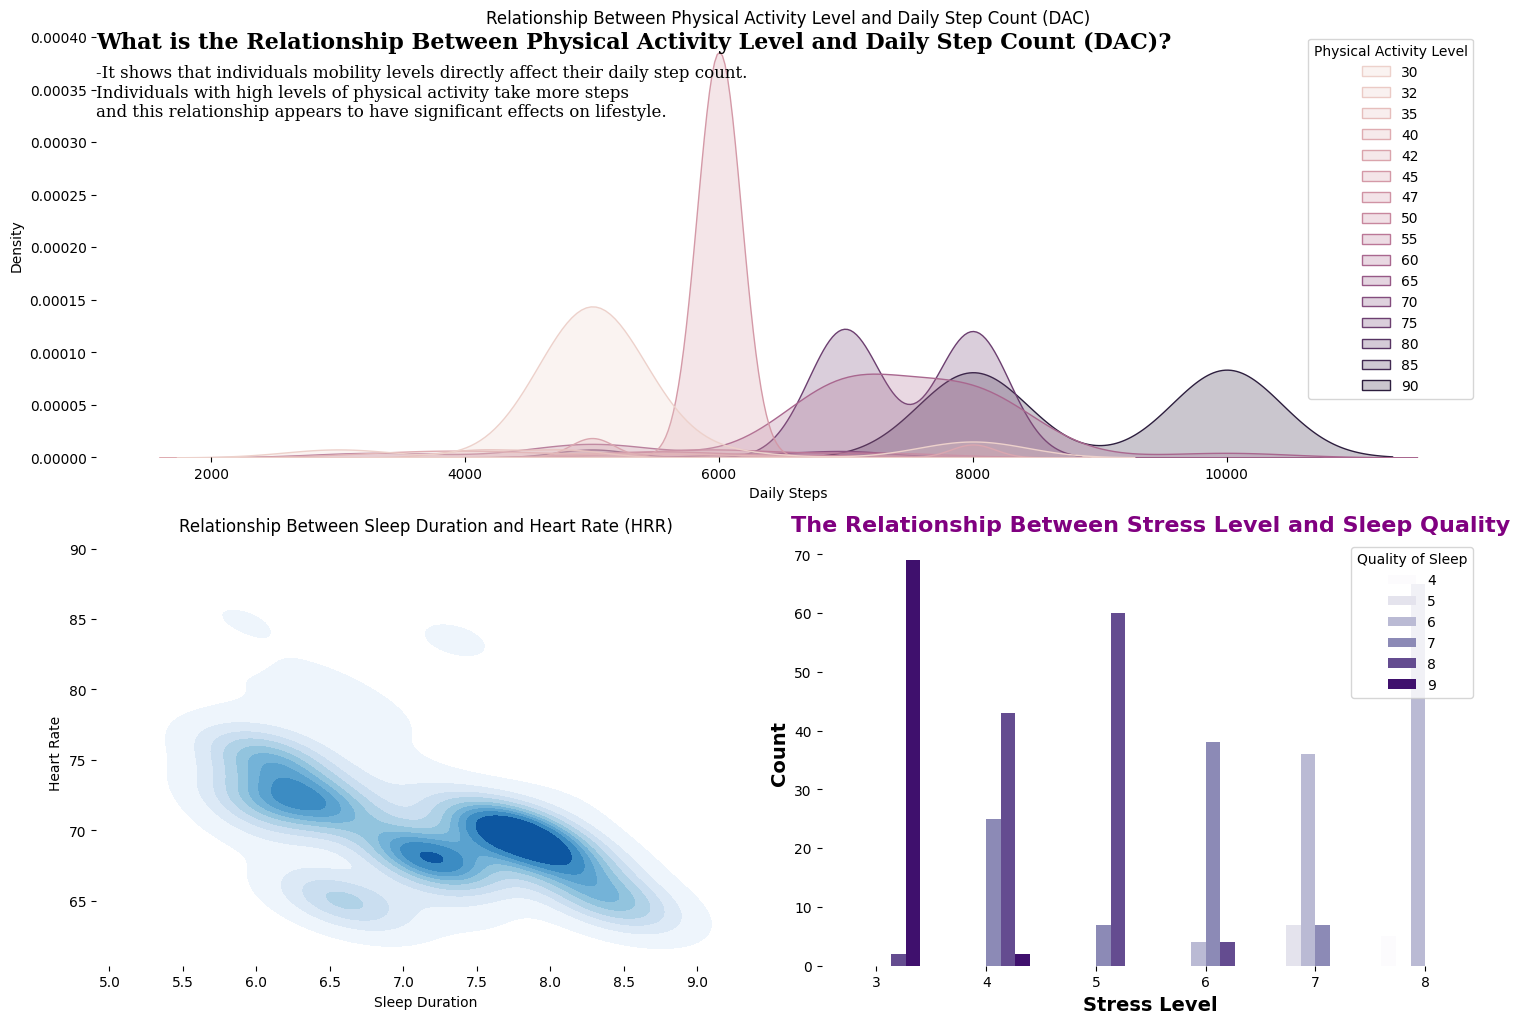

In [38]:
fig = plt.figure(figsize=(15, 15), facecolor='white')

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2) 
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)  
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)  


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)



sns.kdeplot(data=df, x='Daily Steps', hue='Physical Activity Level', fill=True, ax=ax1)
ax1.set_title('Relationship Between Physical Activity Level and Daily Step Count (DAC)')
ax1.text(0, 1, 
         'What is the Relationship Between Physical Activity Level and Daily Step Count (DAC)?', 
         ha='left', va='top', 
         fontweight='bold', fontsize=16, 
         fontname='Serif', color='black', transform=ax1.transAxes)
ax1.text(0, 0.8, 
         '-It shows that individuals mobility levels directly affect their daily step count. \nIndividuals with high levels of physical activity take more steps \nand this relationship appears to have significant effects on lifestyle.', 
         fontsize=12, 
         fontname='Serif', color='black', transform=ax1.transAxes)


sns.kdeplot(data=df, x='Sleep Duration', y='Heart Rate', fill=True, cmap='Blues', ax=ax2)
ax2.set_title('Relationship Between Sleep Duration and Heart Rate (HRR)')

scatter_size = 200 

sns.countplot(x='Stress Level', hue='Quality of Sleep', data=df, ax=ax3, palette='Purples')
ax3.set_title('The Relationship Between Stress Level and Sleep Quality', fontsize=16, fontweight='bold', color='#800080')
ax3.set_xlabel('Stress Level', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=14, fontweight='bold')



plt.tight_layout()
plt.show()

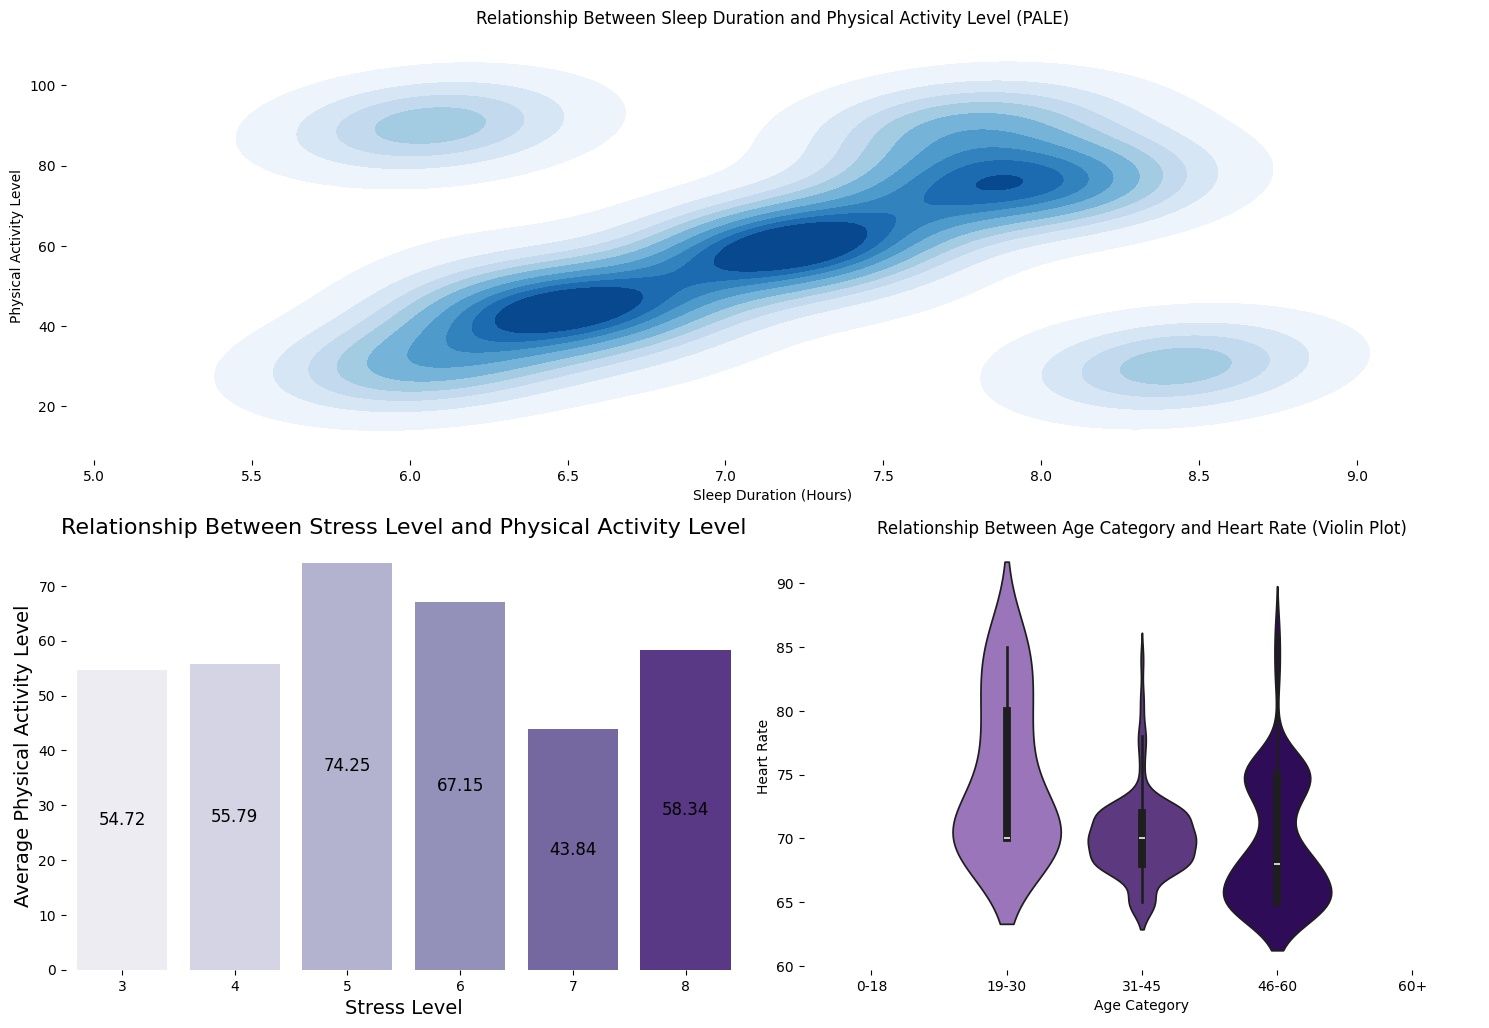

In [ ]:
# 전체 그림(figure) 객체를 생성하고 크기 및 배경색을 설정합니다.
# figsize=(15, 15)는 그림의 가로, 세로 크기를 인치 단위로 지정합니다.
# facecolor='white'는 그림의 배경색을 흰색으로 설정합니다.
fig = plt.figure(figsize=(15, 15), facecolor='white')

# subplot2grid를 사용하여 그리드 기반의 서브플롯 레이아웃을 정의합니다.
# (3, 2)는 3행 2열의 그리드를 의미합니다.
# (0, 0), colspan=2: 첫 번째 서브플롯 (ax1)은 0행 0열에서 시작하여 2칸(전체 너비)을 차지합니다. (상단 전체)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
# (1, 0), colspan=1: 두 번째 서브플롯 (ax2)은 1행 0열에서 시작하여 1칸을 차지합니다. (중간 왼쪽)
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
# (1, 1), colspan=1: 세 번째 서브플롯 (ax3)은 1행 1열에서 시작하여 1칸을 차지합니다. (중간 오른쪽)
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)

# ---

# 각 서브플롯(ax1, ax2, ax3)의 공통적인 시각적 속성을 설정합니다.
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white') # 서브플롯의 배경색을 흰색으로 설정합니다.
    ax.grid(False) # 그리드 선을 표시하지 않습니다.
    for spine in ax.spines.values(): # 그래프 테두리의 모든 'spine' (선)에 접근합니다.
        spine.set_visible(False) # 테두리 선을 보이지 않게 합니다.

# ---

# 첫 번째 서브플롯 (ax1): 수면 시간과 신체 활동 수준 간의 관계를 시각화합니다.
# sns.kdeplot: 커널 밀도 추정 플롯 (Kernel Density Estimate Plot)을 생성합니다.
# x='Sleep Duration', y='Physical Activity Level': x축과 y축에 사용할 데이터프레임 열을 지정합니다.
# data=df: 사용할 데이터프레임을 지정합니다.
# fill=True: 밀도 영역을 색상으로 채웁니다.
# cmap='Blues': 색상 맵을 'Blues' 계열로 설정합니다 (파란색 계열).
# ax=ax1: 이 플롯을 ax1 서브플롯에 그립니다.
sns.kdeplot(x='Sleep Duration', y='Physical Activity Level', data=df, fill=True, cmap='Blues', ax=ax1)
ax1.set_title('Relationship Between Sleep Duration and Physical Activity Level (PALE)') # ax1의 제목 설정
ax1.set_xlabel('Sleep Duration (Hours)') # ax1의 x축 라벨 설정
ax1.set_ylabel('Physical Activity Level') # ax1의 y축 라벨 설정

# ---

# 두 번째 서브플롯 (ax2): 스트레스 수준과 신체 활동 수준 간의 관계를 시각화합니다.
# sns.barplot: 막대 그래프를 생성합니다.
# x='Stress Level', y='Physical Activity Level': x축과 y축에 사용할 데이터프레임 열을 지정합니다.
# data=df: 사용할 데이터프레임을 지정합니다.
# estimator=np.mean: y축 값으로 각 x값에 해당하는 'Physical Activity Level'의 평균을 계산합니다.
# ci=None: 신뢰 구간(confidence interval)을 표시하지 않습니다.
# ax=ax2: 이 플롯을 ax2 서브플롯에 그립니다.
# palette='Purples': 색상 팔레트를 'Purples' 계열로 설정합니다 (보라색 계열).
sns.barplot(x='Stress Level', y='Physical Activity Level', data=df, estimator=np.mean, ci=None, ax=ax2, palette='Purples')
ax2.set_title('Relationship Between Stress Level and Physical Activity Level', fontsize=16) # ax2의 제목 설정
ax2.set_xlabel('Stress Level', fontsize=14) # ax2의 x축 라벨 설정
ax2.set_ylabel('Average Physical Activity Level', fontsize=14) # ax2의 y축 라벨 설정

# 각 막대 위에 평균 값을 텍스트로 표시합니다.
for p in ax2.patches: # ax2의 모든 막대(패치)를 순회합니다.
    # 막대의 중앙 상단에 텍스트를 배치하고, 높이 값을 소수점 둘째 자리까지 표시합니다.
    ax2.text(p.get_x() + p.get_width() / 2., p.get_height() / 2, # 텍스트의 x, y 좌표 설정 (막대 중앙)
             f'{p.get_height():.2f}', # 텍스트 내용 (막대 높이, 소수점 둘째 자리)
             ha='center', va='center', fontsize=12, color='black') # 텍스트 정렬, 폰트 크기, 색상 설정

# ---

# 데이터프레임에 'Age Category'라는 새로운 범주형 열을 생성합니다.
bins = [0, 18, 30, 45, 60, 100] # 나이 구간을 정의합니다.
labels = ['0-18', '19-30', '31-45', '46-60', '60+'] # 각 구간에 대한 라벨을 정의합니다.
# pd.cut: 'Age' 열을 지정된 bins에 따라 범주화하고 labels를 적용합니다.
# right=False: 구간의 오른쪽 경계가 포함되지 않음을 의미합니다 (예: 18 미만).
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# ---

# 세 번째 서브플롯 (ax3): 나이 범주와 심박수 간의 관계를 시각화합니다.
# sns.violinplot: 바이올린 플롯을 생성합니다. 데이터의 분포와 밀도를 동시에 보여줍니다.
# x='Age Category', y='Heart Rate': x축과 y축에 사용할 데이터프레임 열을 지정합니다.
# data=df: 사용할 데이터프레임을 지정합니다.
# ax=ax3: 이 플롯을 ax3 서브플롯에 그립니다.
# palette: 각 바이올린 플롯에 적용할 색상 팔레트를 수동으로 지정합니다.
sns.violinplot(x='Age Category', y='Heart Rate', data=df, ax=ax3, palette=['#D8B7DD', '#9B6AC4', '#5D2E8C', '#2E0063'])
ax3.set_title('Relationship Between Age Category and Heart Rate (Violin Plot)') # ax3의 제목 설정
ax3.set_xlabel('Age Category') # ax3의 x축 라벨 설정
ax3.set_ylabel('Heart Rate') # ax3의 y축 라벨 설정

# ---

# 모든 서브플롯의 레이아웃을 자동으로 조정하여 겹치지 않도록 합니다.
plt.tight_layout()
# 생성된 모든 플롯을 화면에 표시합니다.
plt.show()

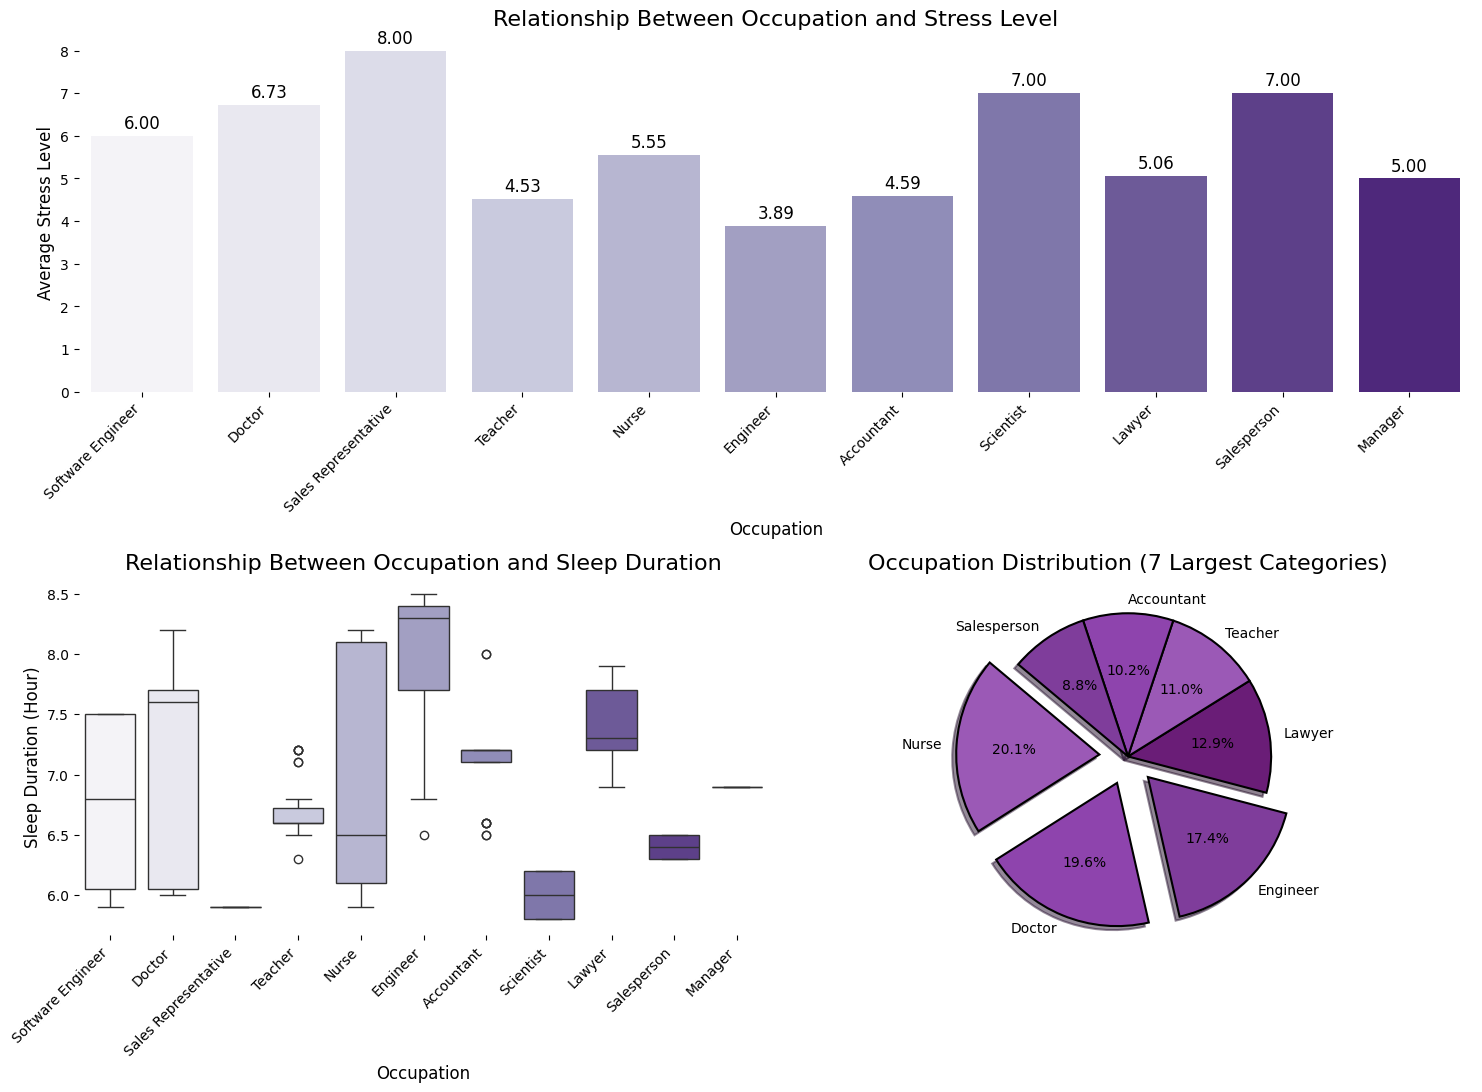

In [41]:
fig = plt.figure(figsize=(15, 15), facecolor='white')

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2) 
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)  
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)  


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)


sns.barplot(x='Occupation', y='Stress Level', data=df, estimator=np.mean, ci=None, 
            palette='Purples', ax=ax1)  
ax1.set_title('Relationship Between Occupation and Stress Level', fontsize=16)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.set_ylabel('Average Stress Level', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', 
                 xytext=(0, 9), textcoords='offset points')


sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='Purples', ax=ax2) 
ax2.set_title('Relationship Between Occupation and Sleep Duration', fontsize=16)
ax2.set_xlabel('Occupation', fontsize=12)
ax2.set_ylabel('Sleep Duration (Hour)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


occupation_counts = df['Occupation'].value_counts().head(7)
colors = ['#9b59b6', '#8e44ad', '#7f3d9b', '#6a1d77', '#9b59b6', '#8e44ad', '#7f3d9b']
explode = [0.2 if i < 3 else 0 for i in range(len(occupation_counts))]

ax3.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', colors=colors, 
       startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})


ax3.set_title('Occupation Distribution (7 Largest Categories)', fontsize=16)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

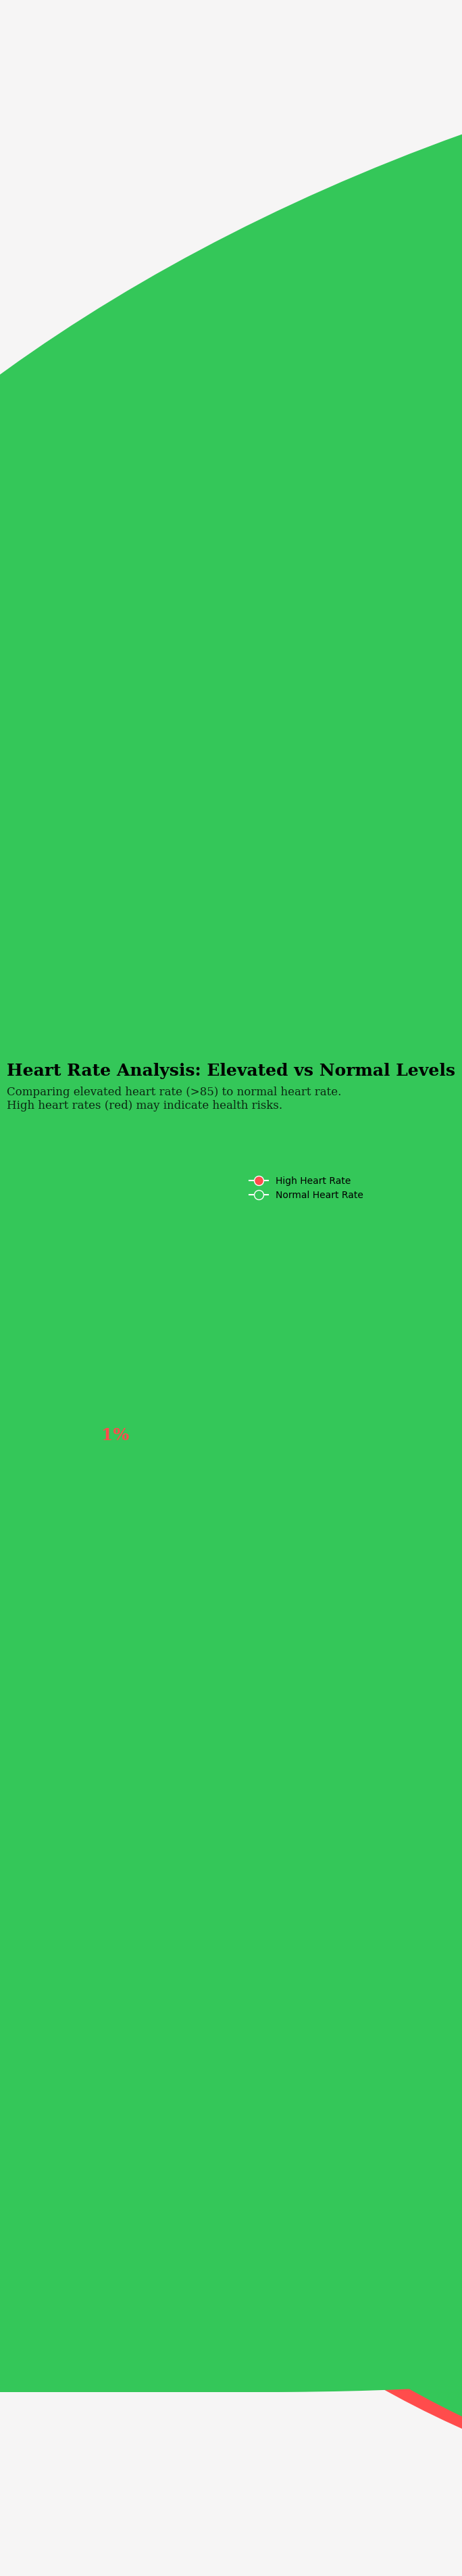

In [42]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

high_heart_rate = df[df['Heart Rate'] > 85]['Heart Rate'].count()  
normal_heart_rate = df[df['Heart Rate'] <= 85]['Heart Rate'].count()

total = high_heart_rate + normal_heart_rate
high_percentage = int(round(high_heart_rate / total * 100, 0))
normal_percentage = int(round(normal_heart_rate / total * 100, 0))

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High Heart Rate": high_heart_rate, "Normal Heart Rate": normal_heart_rate},
    colors=['#ff4c4c', '#34c759'],  
    icons='heartbeat',
    icon_size=20,
    icon_legend=True,
    figsize=(7, 7),
    facecolor='#f6f5f5',
    dpi=100
)

fig.text(0.05, 0.92, 'Heart Rate Analysis: Elevated vs Normal Levels', {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'Comparing elevated heart rate (>85) to normal heart rate.\nHigh heart rates (red) may indicate health risks.', 
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)


fig.text(0.25, 0.15, '{}%'.format(high_percentage), {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff4c4c'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage), {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#34c759'})


plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff4c4c', markersize=10, label='High Heart Rate'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#34c759', markersize=10, label='Normal Heart Rate')
    ],
    loc='upper right', bbox_to_anchor=(0.9, 1.1), frameon=False
)

fig.show()

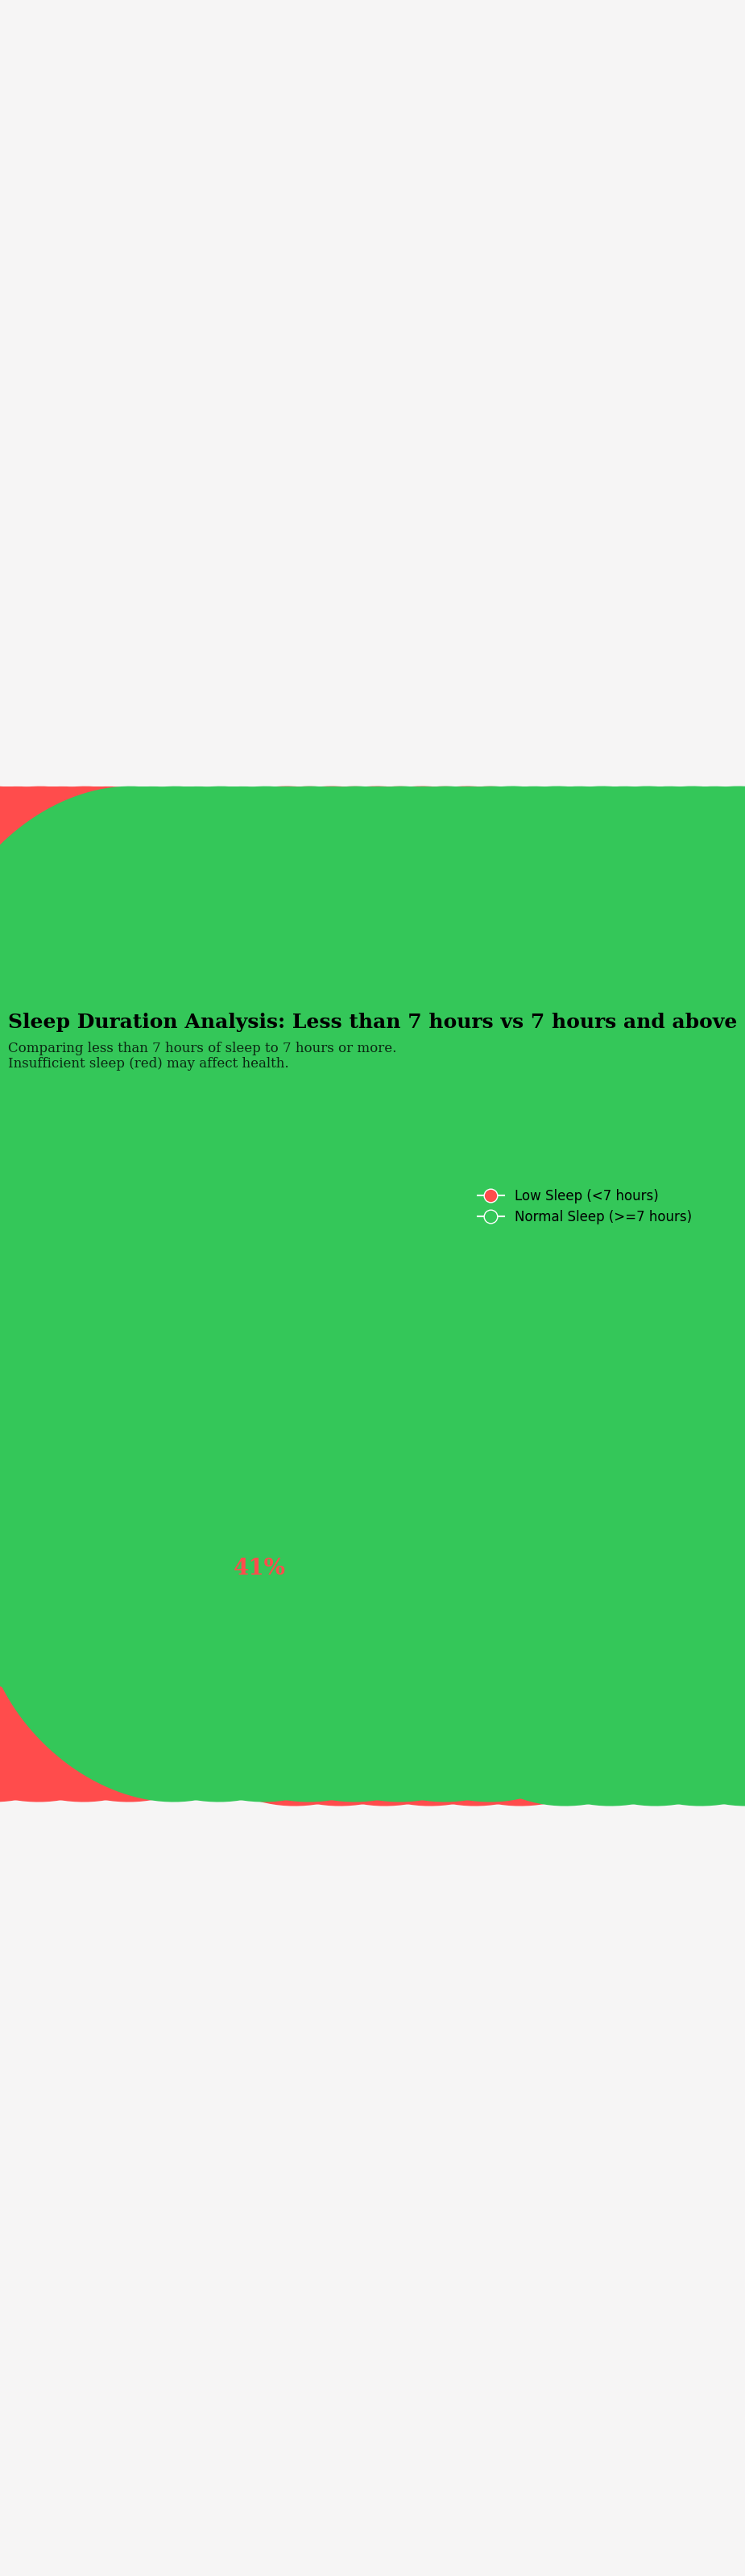

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

# --- 1. 데이터 준비 (이전과 동일) ---
# 이 부분은 사용자의 실제 데이터프레임(df)을 사용해야 합니다.
# 예시 데이터를 만듭니다.

low_sleep = df[df['Sleep Duration'] < 7]['Sleep Duration'].count()
normal_sleep = df[df['Sleep Duration'] >= 7]['Sleep Duration'].count()
total_sleep = low_sleep + normal_sleep
low_sleep_percentage = int(round(low_sleep / total_sleep * 100, 0))
normal_sleep_percentage = int(round(normal_sleep / total_sleep * 100, 0))


# --- 2. Figure 및 Waffle Chart 생성 ---
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"Low Sleep (<7 hours)": low_sleep, "Normal Sleep (>=7 hours)": normal_sleep},
    colors=['#ff4c4c', '#34c759'],
    icons='bed',
    icon_size=20,
    # ✅ 중요: 자동 범례 기능을 끕니다.
    icon_legend=False,
    figsize=(10, 7),  # 가로 길이를 조금 늘려 텍스트 공간 확보
    facecolor='#f6f5f5',
    dpi=100
)

# --- 3. 텍스트 및 범례 추가 ---
# fig.text()를 사용해 Figure 객체에 직접 텍스트를 추가
fig.text(0.02, 0.95, 'Sleep Duration Analysis: Less than 7 hours vs 7 hours and above',
         fontdict={'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.02, 0.88, 'Comparing less than 7 hours of sleep to 7 hours or more.\nInsufficient sleep (red) may affect health.',
         fontdict={'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)

# 백분율 텍스트 추가
fig.text(0.3, -0.02, f'{low_sleep_percentage}%', {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#ff4c4c'})
fig.text(0.7, -0.02, f'{normal_sleep_percentage}%', {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#34c759'})


# 수동으로 범례를 생성하고 위치를 지정
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff4c4c', markersize=12, label='Low Sleep (<7 hours)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#34c759', markersize=12, label='Normal Sleep (>=7 hours)')
    ],
    # ✅ 중요: 범례 위치를 차트 오른쪽 상단으로 명확히 지정
    loc='upper right',
    bbox_to_anchor=(0.98, 0.85), # (x, y) 좌표로 미세 조정
    frameon=False,
    fontsize=12
)

# --- 4. 최종 Figure 표시 ---
# 불필요한 tight_layout()을 제거하고 바로 show() 호출
plt.show()

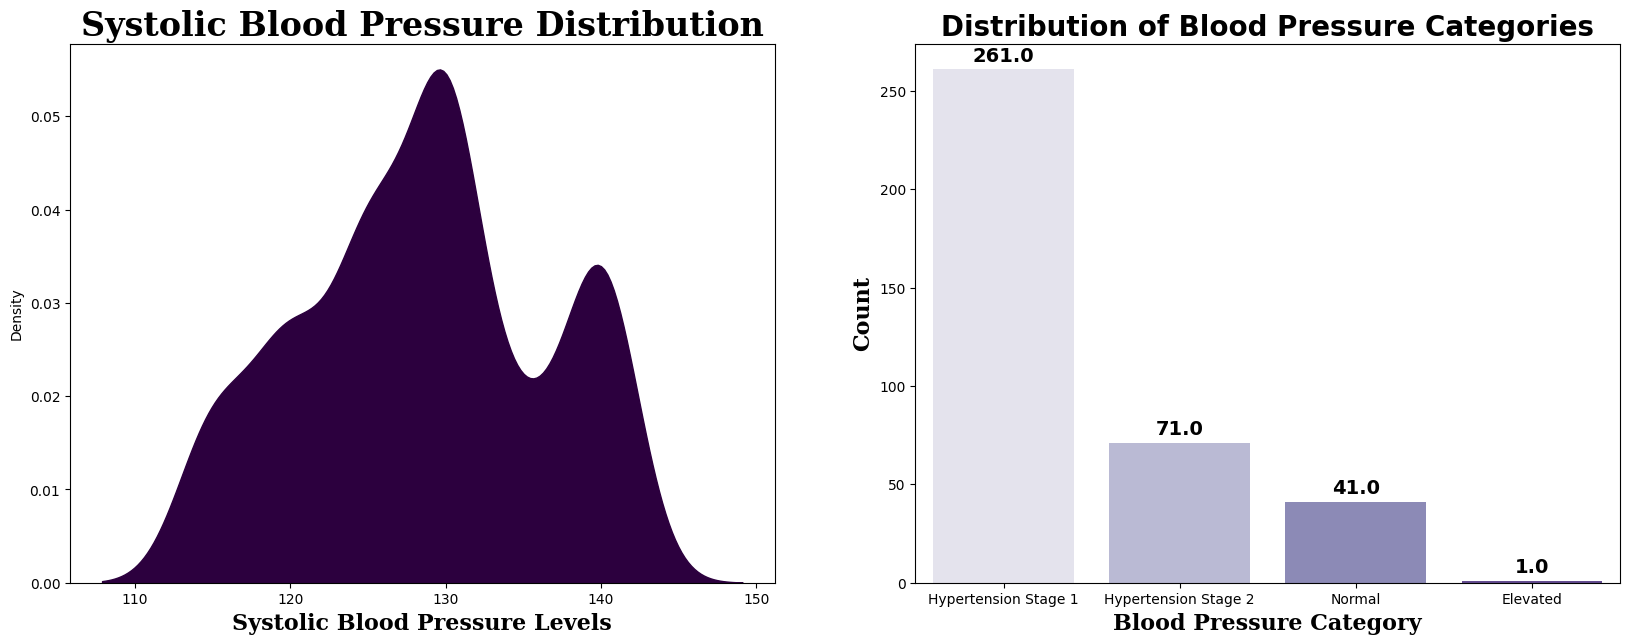

In [45]:
df1['Systolic'] = df1['Blood Pressure'].str.split('/', expand=True)[0].astype(int)
df1['Diastolic'] = df1['Blood Pressure'].str.split('/', expand=True)[1].astype(int)

def categorize_blood_pressure(systolic, diastolic):
    if systolic < 90 and diastolic < 60:
        return 'Low'
    elif 90 <= systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

df1['Blood Pressure Category'] = df1.apply(lambda row: categorize_blood_pressure(row['Systolic'], row['Diastolic']), axis=1)

fig, (ax2, ax) = plt.subplots(1, 2, figsize=(20, 7))


sns.kdeplot(data=df1, x='Systolic', ax=ax2, shade=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Systolic Blood Pressure Levels', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})
ax2.set_title('Systolic Blood Pressure Distribution', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'fontsize': 24})

sns.countplot(data=df1, x='Blood Pressure Category', ax=ax, palette='Purples')

ax.set_xlabel('Blood Pressure Category', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})
ax.set_ylabel('Count', fontdict={'font': 'Serif', 'color': 'black', 'fontsize': 16, 'weight': 'bold'})

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, weight='bold', color='black', 
                xytext=(0, 10), textcoords='offset points')

ax.set_title('Distribution of Blood Pressure Categories', fontsize=20, weight='bold')

plt.show()